# <center> Improving Employee Retention by Predicting Employee Attrition Using Machine Learning

<center> Author : Arya Octavian

------------

# PART 1 - DATA PREPROCESSING

## Import Libraries and Database

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 8)
rcParams['lines.linewidth'] = 3
rcParams['axes.titlesize'] = 'x-large'
rcParams['xtick.labelsize'] = 'medium'
rcParams['ytick.labelsize'] = 'medium'

In [3]:
df = pd.read_csv("hr_data.csv")
df

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,dopeySheep0,106034,Belum_menikah,Wanita,FullTime,Data Engineer,Mid_level,Bagus,Jakarta Pusat,Google_Search,...,+6283343465xxx,dopeySheep0297@icloud.com,Sarjana,1,NaN,NaN,1973-12-08,2011-9-26,2016-03-01,-
283,yearningPorpoise4,106254,-,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Biasa,Jakarta Timur,LinkedIn,...,+6281222782xxx,yearningPorpoise4421@yahoo.com,Sarjana,1,NaN,jam_kerja,1974-12-01,2013-5-13,2020-1-28,2017-11-15
284,murkySausage9,110433,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Pusat,Diversity_Job_Fair,...,+6285821950xxx,murkySausage9688@yahoo.com,Sarjana,1,1.0,ganti_karir,1969-10-30,2013-11-11,2020-1-21,2018-06-08
285,truthfulMoth4,110744,Belum_menikah,Pria,FullTime,Software Engineer (Android),Mid_level,Bagus,Jakarta Utara,Google_Search,...,+6287787391xxx,truthfulMoth4663@yahoo.com,Sarjana,1,0.0,kejelasan_karir,1981-10-01,2011-5-16,2014-04-05,2018-04-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

### Checking Duplicates

In [5]:
print('Duplicates :', df.duplicated().any())

Duplicates : False


### Drop Some Features

In [6]:
# Drop Unnecessary Feature
df_new = df.drop(['Username','EnterpriseID','NomorHP','Email'],axis=1)

# Drop Invalid Features
df_new = df_new.drop(['TanggalPenilaianKaryawan'],axis=1)

# Drop Feature With Null Values >30%
df_new = df_new.drop(['IkutProgramLOP'],axis=1)

## Univariate Analysis - Numerical

In [7]:
df_new.describe()

,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran
count,287.000000,282.000000,284.000000,286.000000,281.000000
mean,3.101045,3.904255,1.179577,0.412587,10.448399
std,0.836388,0.913355,2.294441,1.275016,6.902252
min,1.000000,1.000000,0.000000,0.000000,1.000000
25%,3.000000,3.000000,0.000000,0.000000,5.000000
50%,3.000000,4.000000,0.000000,0.000000,10.000000
75%,4.000000,5.000000,0.000000,0.000000,15.000000
max,5.000000,5.000000,8.000000,6.000000,55.000000


In [8]:
nums = ['SkorSurveyEngagement','SkorKepuasanPegawai','JumlahKeikutsertaanProjek','JumlahKeterlambatanSebulanTerakhir','JumlahKetidakhadiran']
cats = ['StatusPernikahan','JenisKelamin','StatusKepegawaian','Pekerjaan','JenjangKarir','PerformancePegawai','AsalDaerah','HiringPlatform','TingkatPendidikan','PernahBekerja','AlasanResign']

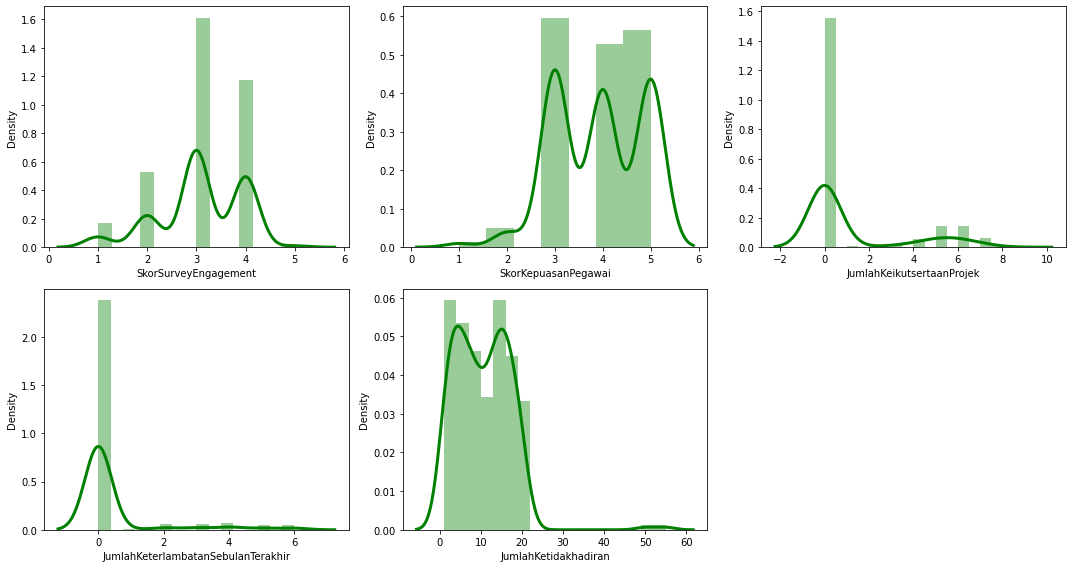

In [9]:
plt.figure(figsize=(15, 8))
for i in range(len(nums)):
    plt.subplot(2,3,i+1)
    sns.distplot(df_new[nums[i]],color='g')
    plt.tight_layout()

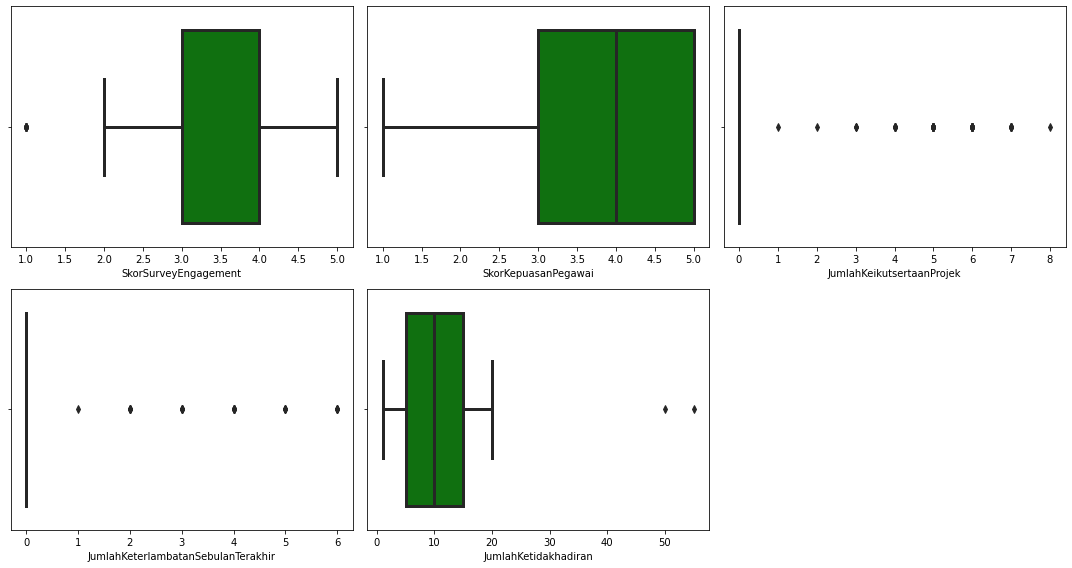

In [10]:
plt.figure(figsize=(15, 8))
for i in range(len(nums)):
    plt.subplot(2,3,i+1)
    sns.boxplot(df_new[nums[i]],color='g')
    plt.tight_layout()

### Handling Outliers

In [11]:
df_new =  df_new.drop(df_new[df_new.JumlahKetidakhadiran>20].index)
df_new.shape

(285, 19)

## Univariate Analysis - Categorical 

In [12]:
df_new[cats].describe()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,TingkatPendidikan,PernahBekerja,AlasanResign
count,285,285,285,285,285,285,285,285,285,285,219
unique,5,2,3,14,3,5,5,9,3,2,11
top,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,Sarjana,1,masih_bekerja
freq,132,166,215,108,168,83,70,85,175,284,130


In [13]:
print(f"Unique values by features\n")

for feature in cats:
    unique_values = df_new[feature].unique()
    print(f"{feature}:\n {unique_values}\n")

Unique values by features

StatusPernikahan:
 ['Belum_menikah' 'Menikah' 'Bercerai' 'Lainnya' '-']

JenisKelamin:
 ['Pria' 'Wanita']

StatusKepegawaian:
 ['Outsource' 'FullTime' 'Internship']

Pekerjaan:
 ['Software Engineer (Back End)' 'Data Analyst'
 'Software Engineer (Front End)' 'Product Manager'
 'Software Engineer (Android)' 'Scrum Master'
 'Product Design (UX Researcher)' 'Product Design (UI & UX)'
 'Digital Product Manager' 'Data Engineer' 'Software Engineer (iOS)'
 'DevOps Engineer' 'Software Architect' 'Machine Learning Engineer']

JenjangKarir:
 ['Freshgraduate_program' 'Senior_level' 'Mid_level']

PerformancePegawai:
 ['Sangat_bagus' 'Sangat_kurang' 'Bagus' 'Biasa' 'Kurang']

AsalDaerah:
 ['Jakarta Timur' 'Jakarta Utara' 'Jakarta Pusat' 'Jakarta Selatan'
 'Jakarta Barat']

HiringPlatform:
 ['Employee_Referral' 'Website' 'Indeed' 'LinkedIn' 'CareerBuilder'
 'Diversity_Job_Fair' 'Google_Search' 'On-line_Web_application' 'Other']

TingkatPendidikan:
 ['Magister' 'Sarjana' 'Do

### Categorical Features - Replace Invalid Values

In [14]:
df_new['StatusPernikahan'].replace('-', 'Lainnya', inplace=True)
df_new['AlasanResign'].replace('Product Design (UI & UX)', 'Lainnya', inplace=True)

### Categorical Features - Drop Constant Feature

In [15]:
df_new = df_new.drop(['PernahBekerja'],axis=1)
df_new.shape

(285, 18)

## Handling Missing Value

In [16]:
df_new.isna().sum()

StatusPernikahan                       0
JenisKelamin                           0
StatusKepegawaian                      0
Pekerjaan                              0
JenjangKarir                           0
PerformancePegawai                     0
AsalDaerah                             0
HiringPlatform                         0
SkorSurveyEngagement                   0
SkorKepuasanPegawai                    5
JumlahKeikutsertaanProjek              3
JumlahKeterlambatanSebulanTerakhir     1
JumlahKetidakhadiran                   6
TingkatPendidikan                      0
AlasanResign                          66
TanggalLahir                           0
TanggalHiring                          0
TanggalResign                          0
dtype: int64

In [17]:
# Replace NULL values in numircal features with their median

df_new['SkorKepuasanPegawai'].fillna(df_new['SkorKepuasanPegawai'].median(), inplace=True)
df_new['JumlahKeikutsertaanProjek'].fillna(df_new['JumlahKeikutsertaanProjek'].median(), inplace=True)
df_new['JumlahKeterlambatanSebulanTerakhir'].fillna(df_new['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df_new['JumlahKetidakhadiran'].fillna(df_new['JumlahKetidakhadiran'].median(), inplace=True)

In [18]:
df_ar = df_new.loc[:, ['AlasanResign', 'TanggalResign']]
df_ar = df_ar.loc[df_ar.AlasanResign.isna(), :]
df_ar.describe()

,AlasanResign,TanggalResign
count,0,66
unique,0,1
top,NaN,-
freq,NaN,66


- There are 66 '-' values in `TanggalResign` and it's the same amount of missing value in `AlasanResign`
- Hence, it's safe to say that all NaN can be replaced by "masih_bekerja" since the user has no resignation date

In [19]:
df_new['AlasanResign'].replace([np.NaN], 'masih_bekerja', inplace=True)

In [20]:
df_new.isna().sum()

StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalResign                         0
dtype: int64

### Create Target

In [21]:
df_new['Resign'] = np.where(df_new['TanggalResign']=='-',0,1)
df_new.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,Resign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,1972-07-01,2011-01-10,-,0
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2018-6-16,1
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,1974-01-07,2011-01-10,2014-9-24,1
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,1979-11-24,2014-2-17,-,0
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,1974-11-07,2013-11-11,2018-09-06,1


In [22]:
df_new['Resign'].value_counts()

0    196
1     89
Name: Resign, dtype: int64

### Changing Datatype - `TanggalLahir` and `TanggalHiring`

In [23]:
df_new['TanggalLahir'] = pd.to_datetime(df_new['TanggalLahir'])
df_new['TanggalHiring'] = pd.to_datetime(df_new['TanggalHiring'])

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    285 non-null    object        
 1   JenisKelamin                        285 non-null    object        
 2   StatusKepegawaian                   285 non-null    object        
 3   Pekerjaan                           285 non-null    object        
 4   JenjangKarir                        285 non-null    object        
 5   PerformancePegawai                  285 non-null    object        
 6   AsalDaerah                          285 non-null    object        
 7   HiringPlatform                      285 non-null    object        
 8   SkorSurveyEngagement                285 non-null    int64         
 9   SkorKepuasanPegawai                 285 non-null    float64       
 10  JumlahKeikutsertaanProjek 

------------

# PART 2 - EDA 1

### Generating New Featurse in New Dataset

In [25]:
df_eda = df_new.copy()

df_eda['TanggalResign'] = pd.to_datetime(df_eda['TanggalResign'], errors='coerce')

In [26]:
df_eda['TahunHiring'] = df_eda['TanggalHiring'].dt.year

df_eda['TahunResign'] = df_eda['TanggalResign'].dt.year
df_eda['TahunResign'].replace([np.NaN], 0, inplace=True)


df_eda.sample(5)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,Resign,TahunHiring,TahunResign
98,Lainnya,Wanita,FullTime,Software Engineer (Front End),Mid_level,Sangat_kurang,Jakarta Barat,Website,1,1.0,...,2.0,17.0,Sarjana,masih_bekerja,1987-05-14,2012-02-20,NaT,0,2012,0.0
261,Belum_menikah,Wanita,FullTime,Software Engineer (Front End),Freshgraduate_program,Biasa,Jakarta Pusat,Indeed,2,3.0,...,4.0,16.0,Sarjana,masih_bekerja,1985-01-07,2011-01-10,NaT,0,2011,0.0
86,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5.0,...,0.0,2.0,Sarjana,toxic_culture,1987-06-14,2016-10-02,2017-03-15,1,2016,2017.0
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,...,0.0,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2018-06-16,1,2014,2018.0
194,Menikah,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,CareerBuilder,4,4.0,...,0.0,20.0,Sarjana,tidak_bisa_remote,1987-11-25,2009-10-26,2014-08-19,1,2009,2014.0


### Aggregate Tahun Hiring

In [27]:
df_masuk = df_eda.groupby(['TahunHiring']).agg({'TanggalLahir' : 'count'}).reset_index()
df_masuk.columns = ['TahunHiring', 'TotalHiring']
df_masuk

,TahunHiring,TotalHiring
0,2006,1
1,2007,2
2,2008,2
3,2009,7
4,2010,8
5,2011,75
6,2012,41
7,2013,42
8,2014,56
9,2015,31


### Aggregate Tahun Resign

In [28]:
df_keluar = df_eda.groupby(['TahunResign']).agg({'TanggalLahir' : 'count'}).reset_index()
df_keluar.columns = ['TahunResign', 'TotalResign']
df_keluar

,TahunResign,TotalResign
0,0.0,196
1,2013.0,5
2,2014.0,12
3,2015.0,8
4,2016.0,8
5,2017.0,19
6,2018.0,26
7,2019.0,5
8,2020.0,6


### Join Table

In [29]:
df_km = pd.merge(df_masuk,df_keluar, left_on='TahunHiring', right_on='TahunResign', how='outer')
df_km[['TahunHiring','TotalHiring','TahunResign','TotalResign']] = df_km[['TahunHiring','TotalHiring','TahunResign','TotalResign']].fillna(0).astype(int)
df_km = df_km.drop(df_km[df_km.TotalResign==196].index)

df_km.loc[14:,'TahunHiring'] = 2019,2020
df_km.loc[:6,'TahunResign'] = range(2006,2013)

df_km['TotalEmployee'] = np.NaN
df_km.loc[0, 'TotalEmployee'] = df_km.loc[0, 'TotalHiring']

df_km = df_km.reset_index(drop=True)
df_km

,TahunHiring,TotalHiring,TahunResign,TotalResign,TotalEmployee
0,2006,1,2006,0,1.0
1,2007,2,2007,0,NaN
2,2008,2,2008,0,NaN
3,2009,7,2009,0,NaN
4,2010,8,2010,0,NaN
5,2011,75,2011,0,NaN
6,2012,41,2012,0,NaN
7,2013,42,2013,5,NaN
8,2014,56,2014,12,NaN
9,2015,31,2015,8,NaN


In [30]:
for i in range(1, len(df_km)):
    df_km.loc[i, 'TotalEmployee'] = round(df_km.loc[i-1, 'TotalEmployee'] + df_km.loc[i, 'TotalHiring'] - df_km.loc[i, 'TotalResign'],0)

df_km['TotalEmployee'] = df_km['TotalEmployee'].astype(int)
df_km['YearlyChange'] = df_km.TotalEmployee.diff().fillna(0).astype(int)
df_km

,TahunHiring,TotalHiring,TahunResign,TotalResign,TotalEmployee,YearlyChange
0,2006,1,2006,0,1,0
1,2007,2,2007,0,3,2
2,2008,2,2008,0,5,2
3,2009,7,2009,0,12,7
4,2010,8,2010,0,20,8
5,2011,75,2011,0,95,75
6,2012,41,2012,0,136,41
7,2013,42,2013,5,173,37
8,2014,56,2014,12,217,44
9,2015,31,2015,8,240,23


### Waterfall Chart

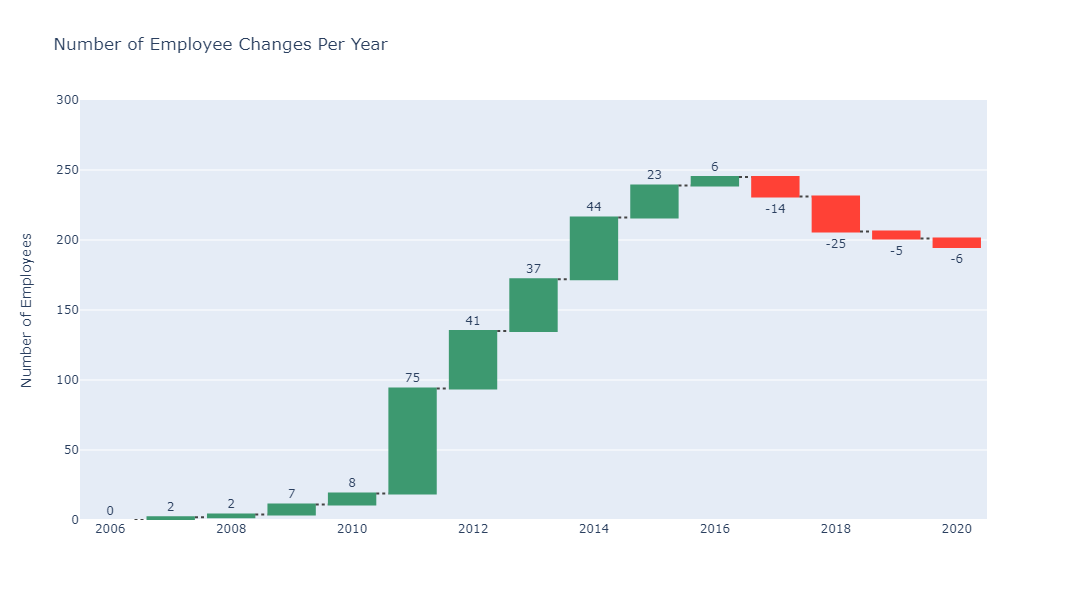

In [31]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

fig = go.Figure()
fig.add_trace(go.Waterfall(x = df_km['TahunHiring'], 
                           y = df_km['YearlyChange'], 
                           base = 0,
                           connector = {"line":{"dash":"dot"}},
                           textposition = "outside",
                           orientation = "v",
                           text = df_km['YearlyChange'].tolist(),
                          ))

fig.update_layout(title = "Number of Employee Changes Per Year", height = 600, width = 1000)
fig.update_yaxes(range = (0, 300), title = "Number of Employees")
fig.show()

----------

# PART 3 - EDA 2

### Dataframe Employees Resign

In [32]:
df_rsgn = df_eda[df_eda['Resign']==1]
df_rsgn.sample(3)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,Resign,TahunHiring,TahunResign
103,Belum_menikah,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_kurang,Jakarta Barat,Diversity_Job_Fair,3,4.0,...,0.0,2.0,Sarjana,jam_kerja,1970-05-15,2011-11-07,2018-11-15,1,2011,2018.0
158,Bercerai,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,Diversity_Job_Fair,3,4.0,...,0.0,12.0,Sarjana,ganti_karir,1974-01-12,2011-01-10,2016-03-31,1,2011,2016.0
50,Menikah,Wanita,FullTime,Product Design (UI & UX),Freshgraduate_program,Sangat_kurang,Jakarta Pusat,Indeed,3,3.0,...,0.0,2.0,Sarjana,ganti_karir,1958-12-27,2013-08-19,2013-09-26,1,2013,2013.0


### Dataframe Employees Still Working

In [33]:
df_work = df_eda[df_eda['Resign']==0]
df_work.sample(3)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,Resign,TahunHiring,TahunResign
219,Belum_menikah,Pria,Outsource,Software Engineer (Android),Mid_level,Sangat_bagus,Jakarta Barat,Diversity_Job_Fair,3,4.0,...,0.0,8.0,Sarjana,masih_bekerja,1964-01-04,2012-01-09,NaT,0,2012,0.0
150,Menikah,Wanita,FullTime,Software Engineer (Front End),Senior_level,Biasa,Jakarta Timur,Indeed,1,2.0,...,6.0,20.0,Sarjana,masih_bekerja,1968-07-20,2012-02-20,NaT,0,2012,0.0
237,Lainnya,Wanita,FullTime,Software Engineer (Back End),Freshgraduate_program,Biasa,Jakarta Selatan,Indeed,3,3.0,...,0.0,6.0,Sarjana,masih_bekerja,1992-05-07,2015-06-05,NaT,0,2015,0.0


### Aggregates

In [34]:
df_job_rsgn = df_rsgn.groupby('Pekerjaan').agg({'Resign' : 'count'}).reset_index()
df_job_rsgn.columns = ['Pekerjaan', 'TotalResgin']
df_job_rsgn

,Pekerjaan,TotalResgin
0,Data Analyst,8
1,Data Engineer,3
2,Product Design (UI & UX),9
3,Product Manager,6
4,Software Engineer (Android),7
5,Software Engineer (Back End),28
6,Software Engineer (Front End),28


In [35]:
df_job_work = df_work.groupby('Pekerjaan').agg({'Resign' : 'count'}).reset_index()
df_job_work.columns = ['Pekerjaan', 'TotalStillWorking']
df_job_work

,Pekerjaan,TotalStillWorking
0,Data Analyst,8
1,Data Engineer,7
2,DevOps Engineer,3
3,Digital Product Manager,2
4,Machine Learning Engineer,2
5,Product Design (UI & UX),15
6,Product Design (UX Researcher),1
7,Product Manager,11
8,Scrum Master,3
9,Software Architect,1


### Join Tables

In [36]:
df_join_job = pd.merge(df_job_rsgn,df_job_work, left_on='Pekerjaan', right_on='Pekerjaan', how='outer')
df_join_job['TotalResgin'] = df_join_job[['TotalResgin']].fillna(0).astype(int)
df_join_job

,Pekerjaan,TotalResgin,TotalStillWorking
0,Data Analyst,8,8
1,Data Engineer,3,7
2,Product Design (UI & UX),9,15
3,Product Manager,6,11
4,Software Engineer (Android),7,17
5,Software Engineer (Back End),28,80
6,Software Engineer (Front End),28,43
7,DevOps Engineer,0,3
8,Digital Product Manager,0,2
9,Machine Learning Engineer,0,2


In [37]:
df_join_job['TotalEmployees'] = df_join_job['TotalResgin'] + df_join_job['TotalStillWorking']
df_join_job['StillWorkingPercentage(%)'] = round(df_join_job['TotalStillWorking']/df_join_job['TotalEmployees']*100,0).astype(int)
df_join_job

,Pekerjaan,TotalResgin,TotalStillWorking,TotalEmployees,StillWorkingPercentage(%)
0,Data Analyst,8,8,16,50
1,Data Engineer,3,7,10,70
2,Product Design (UI & UX),9,15,24,62
3,Product Manager,6,11,17,65
4,Software Engineer (Android),7,17,24,71
5,Software Engineer (Back End),28,80,108,74
6,Software Engineer (Front End),28,43,71,61
7,DevOps Engineer,0,3,3,100
8,Digital Product Manager,0,2,2,100
9,Machine Learning Engineer,0,2,2,100


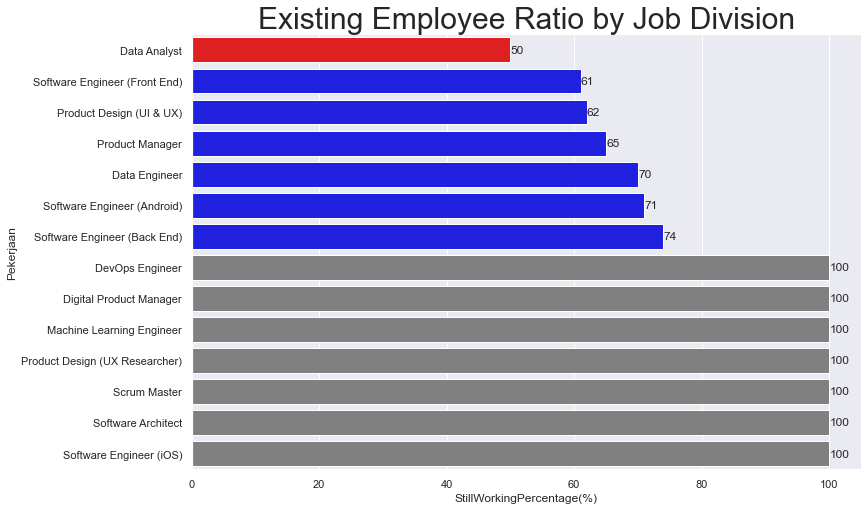

In [38]:
cols = ['red' if x < 60 else ('blue' if x < 100 else 'grey') for x in df_join_job['StillWorkingPercentage(%)']]

ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_join_job,
            x='StillWorkingPercentage(%)',
            y='Pekerjaan',
            palette = cols,
            order = df_join_job.sort_values('StillWorkingPercentage(%)').Pekerjaan)
plt.title('Existing Employee Ratio by Job Division', size=30)
ax.bar_label(ax.containers[0])
plt.show()

### Analysis for Highest Turn Over Rate Division

In [39]:
df_da = df_rsgn[df_rsgn['Pekerjaan']=='Data Analyst']
df_da

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,Resign,TahunHiring,TahunResign
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,...,0.0,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2018-06-16,1,2014,2018.0
18,Bercerai,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Pusat,Diversity_Job_Fair,3,4.0,...,0.0,17.0,Sarjana,internal_conflict,1968-05-30,2012-04-02,2017-09-12,1,2012,2017.0
86,Menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Timur,Indeed,3,5.0,...,0.0,2.0,Sarjana,toxic_culture,1987-06-14,2016-10-02,2017-03-15,1,2016,2017.0
102,Menikah,Pria,Outsource,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Barat,Google_Search,3,3.0,...,0.0,20.0,Sarjana,toxic_culture,1984-05-09,2012-04-02,2018-06-08,1,2012,2018.0
106,Lainnya,Wanita,FullTime,Data Analyst,Freshgraduate_program,Bagus,Jakarta Barat,CareerBuilder,4,3.0,...,0.0,20.0,Sarjana,toxic_culture,1987-01-07,2013-01-07,2014-08-19,1,2013,2014.0
108,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,4,4.0,...,0.0,10.0,Sarjana,toxic_culture,1976-09-22,2015-03-30,2014-08-19,1,2015,2014.0
233,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Sangat_bagus,Jakarta Utara,Diversity_Job_Fair,4,3.0,...,0.0,4.0,Magister,toxic_culture,1970-02-11,2009-07-06,2015-06-05,1,2009,2015.0
239,Belum_menikah,Wanita,Outsource,Data Analyst,Freshgraduate_program,Biasa,Jakarta Utara,Google_Search,4,4.0,...,0.0,2.0,Magister,internal_conflict,1989-09-08,2011-07-11,2017-06-25,1,2011,2017.0


In [40]:
order_performa = 'Sangat_bagus','Bagus','Biasa','Sangat_kurang'
df_da['PerformancePegawai'] = pd.Categorical(df_da['PerformancePegawai'], categories=order_performa, ordered=True)

In [41]:
df_da_gb = df_da.groupby(['Pekerjaan','JenjangKarir', 'PerformancePegawai','AlasanResign']).agg({'Resign' : 'count'}).reset_index()
df_da_gb.drop([2,6], axis=0, inplace=True)
df_da_gb

,Pekerjaan,JenjangKarir,PerformancePegawai,AlasanResign,Resign
0,Data Analyst,Freshgraduate_program,Sangat_bagus,internal_conflict,1
1,Data Analyst,Freshgraduate_program,Sangat_bagus,toxic_culture,3
3,Data Analyst,Freshgraduate_program,Bagus,toxic_culture,1
4,Data Analyst,Freshgraduate_program,Biasa,internal_conflict,1
5,Data Analyst,Freshgraduate_program,Biasa,toxic_culture,1
7,Data Analyst,Freshgraduate_program,Sangat_kurang,toxic_culture,1


### Plot

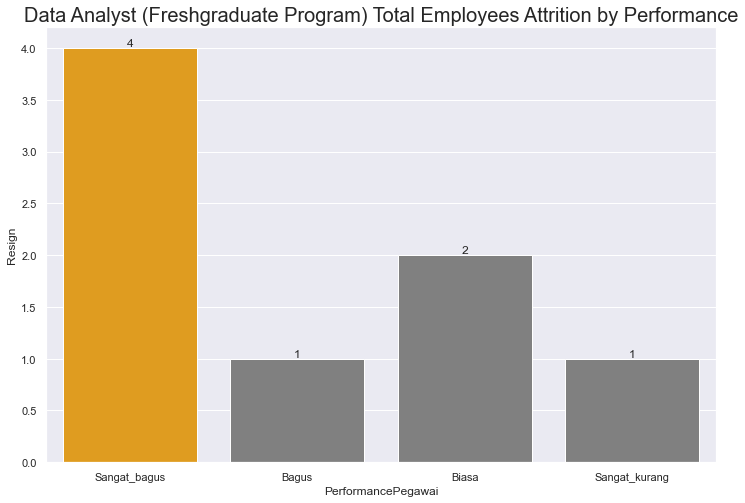

In [42]:
df_pp = df_da_gb.groupby('PerformancePegawai').sum().reset_index()

cols = ['orange' if x == 4 else 'grey' for x in df_pp['Resign']]

ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_pp,
            x='PerformancePegawai',
            y='Resign',
            palette = cols)
plt.title('Data Analyst (Freshgraduate Program) Total Employees Attrition by Performance', size=20)
ax.bar_label(ax.containers[0])
plt.show()

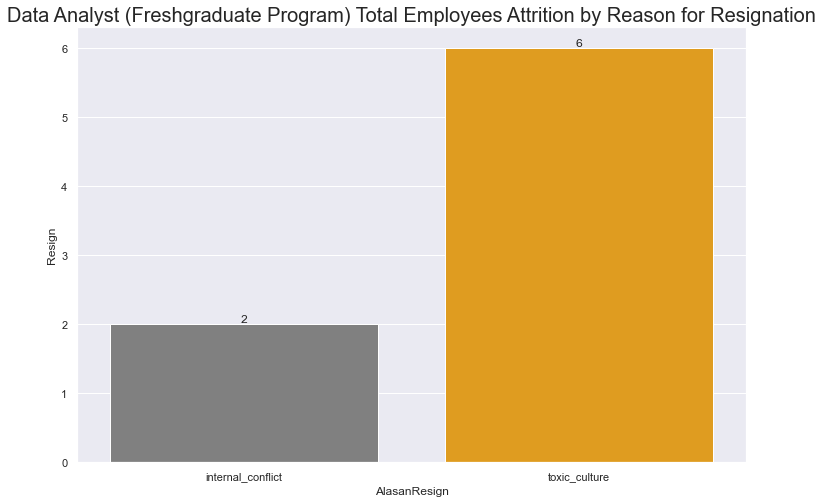

In [43]:
df_pp = df_da_gb.groupby('AlasanResign').sum().reset_index()

cols = ['orange' if x == 6 else 'grey' for x in df_pp['Resign']]

ax = sns.set_theme(style='darkgrid')
ax = sns.barplot(data=df_pp,
            x='AlasanResign',
            y='Resign',
            palette = cols)
plt.title('Data Analyst (Freshgraduate Program) Total Employees Attrition by Reason for Resignation', size=20)
ax.bar_label(ax.containers[0])
plt.show()

### Sunburst Chart

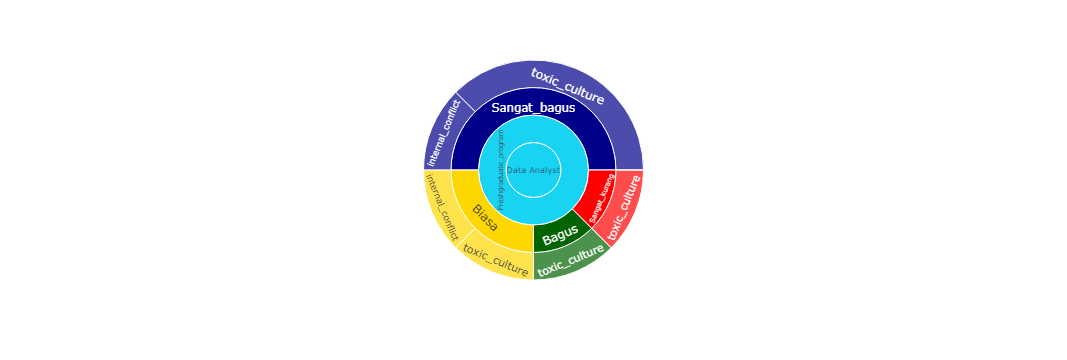

In [44]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df_da_gb, path=['Pekerjaan', 'JenjangKarir', 'PerformancePegawai', 'AlasanResign'], values='Resign' ,
                  color='PerformancePegawai', 
                  color_discrete_map={'Sangat_bagus':'darkblue', 'Bagus':'darkgreen', 'Biasa':'gold', 'Sangat_kurang':'red'})
fig.show()

----------------

# PART 4

In [45]:
df_ml = df_new.copy()
df_ml.shape

(285, 19)

In [46]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 0 to 286
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   StatusPernikahan                    285 non-null    object        
 1   JenisKelamin                        285 non-null    object        
 2   StatusKepegawaian                   285 non-null    object        
 3   Pekerjaan                           285 non-null    object        
 4   JenjangKarir                        285 non-null    object        
 5   PerformancePegawai                  285 non-null    object        
 6   AsalDaerah                          285 non-null    object        
 7   HiringPlatform                      285 non-null    object        
 8   SkorSurveyEngagement                285 non-null    int64         
 9   SkorKepuasanPegawai                 285 non-null    float64       
 10  JumlahKeikutsertaanProjek 

## Feature Engineering

### Changing Datatype - `TanggalResign`

- Since in the original dataset the latest resignation occured in 2020, so we replaced "-" in `TanggalResign` with "2021-01-01" which represents the existing employees and assumed the dataset was created on that exact date.

In [47]:
df_ml['TanggalResign'].replace('-', '2021-01-01', inplace=True)
df_ml.head(5)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalLahir,TanggalHiring,TanggalResign,Resign
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,1972-07-01,2011-01-10,2021-01-01,0
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,1984-04-26,2014-01-06,2018-6-16,1
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,1974-01-07,2011-01-10,2014-9-24,1
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,1979-11-24,2014-02-17,2021-01-01,0
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,1974-11-07,2013-11-11,2018-09-06,1


In [48]:
df_ml['TanggalResign'] = pd.to_datetime(df_ml['TanggalResign'],format='%Y-%m-%d')

## Feature Extraction

### Usia

In [49]:
df_ml['TahunLahir'] = df_ml['TanggalLahir'].dt.year

df_ml['Usia'] = 2021 - df_ml['TahunLahir']

df_ml = df_ml.drop(['TanggalLahir','TahunLahir'],axis=1)
df_ml.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalHiring,TanggalResign,Resign,Usia
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,2011-01-10,2021-01-01,0,49
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,2014-01-06,2018-06-16,1,37
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,2011-01-10,2014-09-24,1,47
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,2014-02-17,2021-01-01,0,42
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,2013-11-11,2018-09-06,1,47


In [50]:
df_ml['Usia'].describe()

count    285.000000
mean      42.403509
std        8.826695
min       29.000000
25%       35.000000
50%       41.000000
75%       48.000000
max       70.000000
Name: Usia, dtype: float64

### LamaBekerja

In [51]:
df_ml['TahunLamaBekerja'] = df_ml['TanggalResign'] - df_ml['TanggalHiring']

# Turn the value into years
df_ml['TahunLamaBekerja'] = round(df_ml['TahunLamaBekerja'].apply(lambda x: x.days/365)).astype(int)
df_ml.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalHiring,TanggalResign,Resign,Usia,TahunLamaBekerja
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,0.0,0.0,9.0,Magister,masih_bekerja,2011-01-10,2021-01-01,0,49,10
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,4.0,0.0,3.0,Sarjana,toxic_culture,2014-01-06,2018-06-16,1,37,4
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,0.0,0.0,11.0,Magister,jam_kerja,2011-01-10,2014-09-24,1,47,4
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,0.0,4.0,6.0,Sarjana,masih_bekerja,2014-02-17,2021-01-01,0,42,7
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,0.0,0.0,11.0,Sarjana,ganti_karir,2013-11-11,2018-09-06,1,47,5


In [52]:
df_ml['TahunLamaBekerja'].describe()

count    285.000000
mean       6.740351
std        2.874601
min       -4.000000
25%        6.000000
50%        7.000000
75%        9.000000
max       15.000000
Name: TahunLamaBekerja, dtype: float64

- The minimum values have negative values which mean impossible for a working duration
- So we need to check it or even drop it

In [53]:
df_ml.loc[df_ml['TahunLamaBekerja']<0, :]

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalHiring,TanggalResign,Resign,Usia,TahunLamaBekerja
108,Belum_menikah,Wanita,FullTime,Data Analyst,Freshgraduate_program,Biasa,Jakarta Timur,CareerBuilder,4,4.0,0.0,0.0,10.0,Sarjana,toxic_culture,2015-03-30,2014-08-19,1,45,-1
207,Menikah,Wanita,FullTime,Software Engineer (Front End),Mid_level,Sangat_bagus,Jakarta Pusat,Indeed,4,3.0,5.0,0.0,17.0,Sarjana,leadership,2017-01-07,2013-05-30,1,49,-4


- Since it is mostlikely an invalid data (maybe human error) we cant risk to swap the values in both columns
- So the safest way to handle this is remove those rows from dataset

In [54]:
df_ml = df_ml.drop(df_ml[df_ml.TahunLamaBekerja<0].index)
df_ml.shape

(283, 20)

## Feature Encoding

In [55]:
df_ml['TahunHiring'] = df_ml['TanggalHiring'].dt.year

### Feature Selection

In [56]:
df_final = df_ml.copy()

In [57]:
# Drop TahunHiring and TahunResign because it's a date and most certaintly a unique value for each user.

# Drop AlasanResign because we only get reasons for leaving after an employee has left, 
# Whereas we want to generate a model that can predict which employees have the potential to leave.
# logically hiring platforms hav nothing to do with the employee's intention to resign after working for a long time

df_final = df_final.drop(['TanggalHiring','TanggalResign','AlasanResign','HiringPlatform','AsalDaerah'],axis=1)
df_final.head(3)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Resign,Usia,TahunLamaBekerja,TahunHiring
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,4,4.0,0.0,0.0,9.0,Magister,0,49,10,2011
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,4,4.0,4.0,0.0,3.0,Sarjana,1,37,4,2014
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,4,3.0,0.0,0.0,11.0,Magister,1,47,4,2011


### Label Encoding

In [58]:
mapping_karir = {
    'Freshgraduate_program' : 0,
    'Mid_level' : 1,
    'Senior_level' : 2}
df_final['JenjangKarir'] = df_final['JenjangKarir'].map(mapping_karir)

mapping_perform = {
    'Sangat_kurang' : 0,
    'Kurang' : 1,
    'Biasa' : 2,
    'Bagus' : 3,
    'Sangat_bagus' : 4}
df_final['PerformancePegawai'] = df_final['PerformancePegawai'].map(mapping_perform)

mapping_edu = {
    'Sarjana' : 0,
    'Magister' : 1,
    'Doktor' : 2}
df_final['TingkatPendidikan'] = df_final['TingkatPendidikan'].map(mapping_edu)

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_final['JenisKelamin'] =le.fit_transform(df_final['JenisKelamin'])
df_final['StatusKepegawaian'] =le.fit_transform(df_final['StatusKepegawaian'])

df_final.head(3)

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Resign,Usia,TahunLamaBekerja,TahunHiring
0,Belum_menikah,0,2,Software Engineer (Back End),0,4,4,4.0,0.0,0.0,9.0,1,0,49,10,2011
1,Belum_menikah,0,0,Data Analyst,0,0,4,4.0,4.0,0.0,3.0,0,1,37,4,2014
2,Menikah,0,0,Software Engineer (Front End),0,3,4,3.0,0.0,0.0,11.0,1,1,47,4,2011


### One Hot Encoding

In [60]:
ohe_divisi = pd.get_dummies(df_final['Pekerjaan'], prefix='Divisi')
ohe_status = pd.get_dummies(df_final['StatusPernikahan'], prefix='StatusHubungan')

In [61]:
df_final = pd.concat([df_final,ohe_divisi,ohe_status],axis=1)
df_final.drop(['Pekerjaan','StatusPernikahan'],axis=1,inplace=True)

In [62]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283 entries, 0 to 286
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   JenisKelamin                           283 non-null    int32  
 1   StatusKepegawaian                      283 non-null    int32  
 2   JenjangKarir                           283 non-null    int64  
 3   PerformancePegawai                     283 non-null    int64  
 4   SkorSurveyEngagement                   283 non-null    int64  
 5   SkorKepuasanPegawai                    283 non-null    float64
 6   JumlahKeikutsertaanProjek              283 non-null    float64
 7   JumlahKeterlambatanSebulanTerakhir     283 non-null    float64
 8   JumlahKetidakhadiran                   283 non-null    float64
 9   TingkatPendidikan                      283 non-null    int64  
 10  Resign                                 283 non-null    int32  
 11  Usia  

### Feature Selection 2

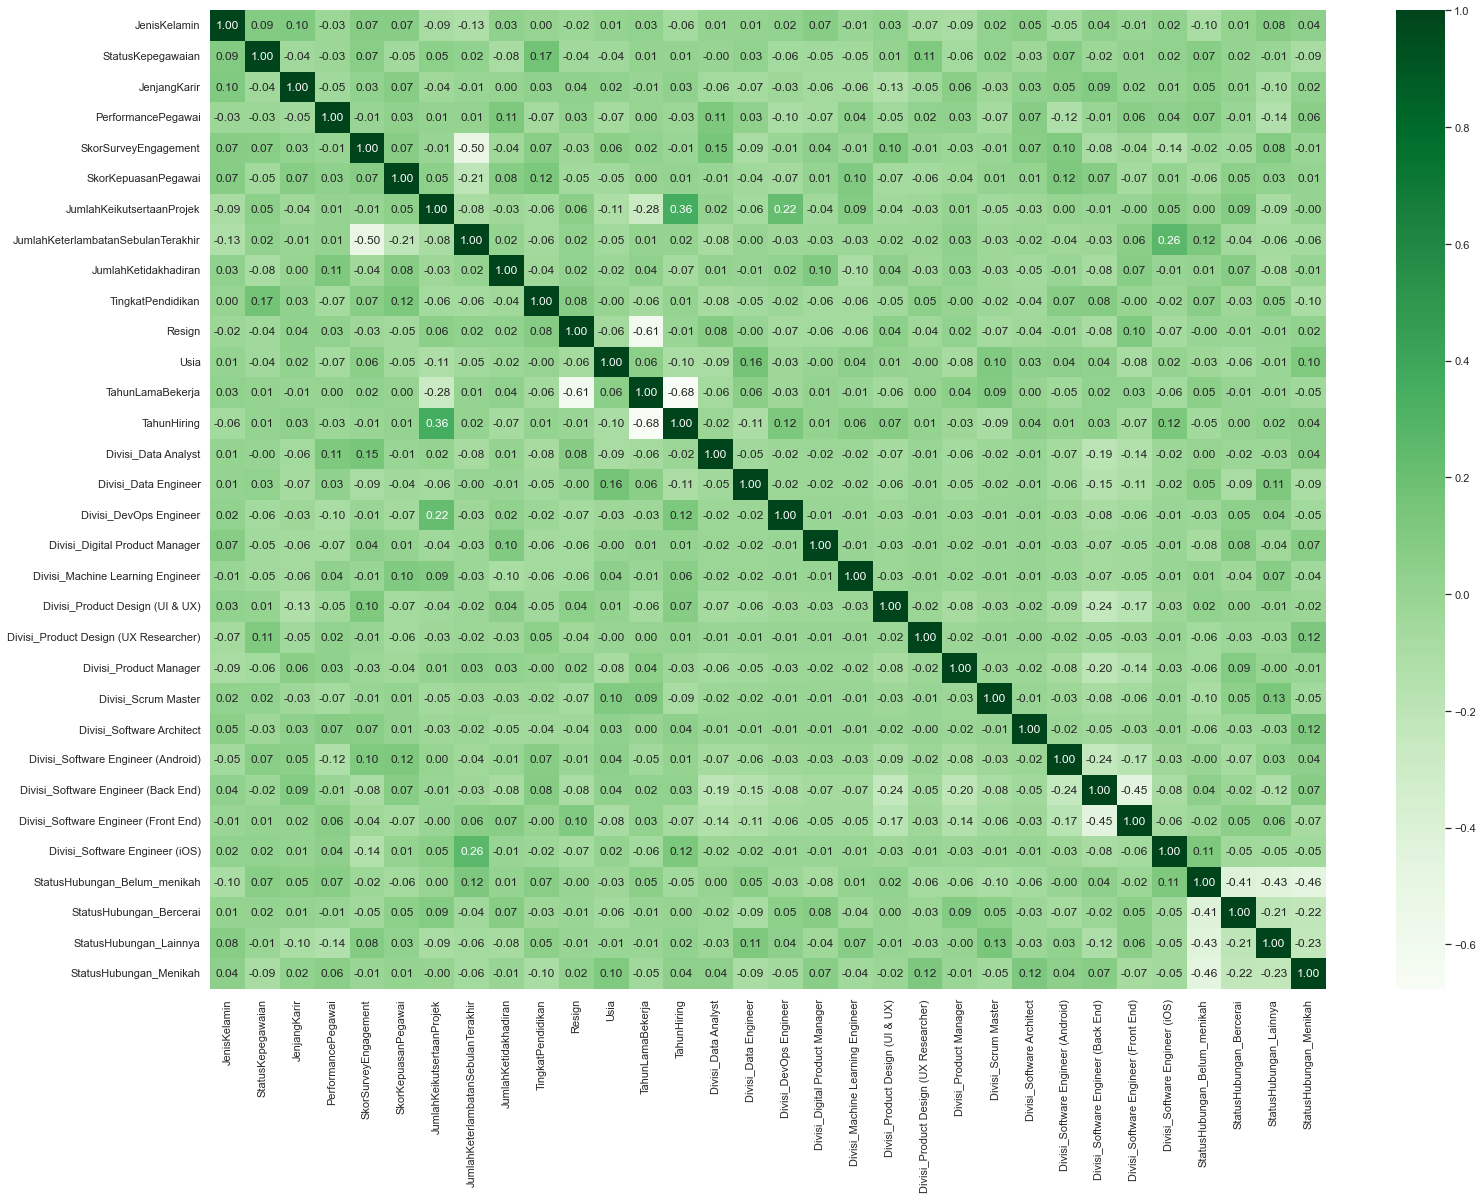

In [63]:
plt.figure(figsize=(25,18))
sns.heatmap(df_final.corr(), cmap='Greens', annot=True, fmt='.2f')
plt.show()

In [64]:
df_final.drop(['StatusKepegawaian'],axis=1,inplace=True)

In [65]:
df_final.isna().sum()

JenisKelamin                             0
JenjangKarir                             0
PerformancePegawai                       0
SkorSurveyEngagement                     0
SkorKepuasanPegawai                      0
JumlahKeikutsertaanProjek                0
JumlahKeterlambatanSebulanTerakhir       0
JumlahKetidakhadiran                     0
TingkatPendidikan                        0
Resign                                   0
Usia                                     0
TahunLamaBekerja                         0
TahunHiring                              0
Divisi_Data Analyst                      0
Divisi_Data Engineer                     0
Divisi_DevOps Engineer                   0
Divisi_Digital Product Manager           0
Divisi_Machine Learning Engineer         0
Divisi_Product Design (UI & UX)          0
Divisi_Product Design (UX Researcher)    0
Divisi_Product Manager                   0
Divisi_Scrum Master                      0
Divisi_Software Architect                0
Divisi_Soft

In [66]:
df_final.shape

(283, 31)

## Split Dataset

In [67]:
X = df_final.drop(['Resign'],axis=1)
y = df_final['Resign']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

print(f'Jumlah Data Train : {X_train.shape[0]}')
print(f'Jumlah Data Test: {X_test.shape[0]}')

Jumlah Data Train : 198
Jumlah Data Test: 85


In [68]:
y_test.value_counts()

0    59
1    26
Name: Resign, dtype: int64

## Rescaling Features

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

In [70]:
X_test = sc.transform(X_test)

## Oversampling

In [71]:
# BEFORE OVERSAMPLING
print(pd.Series(y_train).value_counts())

0    137
1     61
Name: Resign, dtype: int64


In [72]:
# AFTER OVERSAMPLING
from imblearn import over_sampling

X_oversampling , y_oversampling = over_sampling.SMOTE(random_state=42).fit_resample(X_train,y_train)
print(pd.Series(y_oversampling).value_counts())

1    137
0    137
Name: Resign, dtype: int64


## Modelling

### Model Evaluation Function

In [73]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score, confusion_matrix

#Evaluation using train test split
def evaluation(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_oversampling)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_oversampling)
    
    print('**EVALUATION WITH TRAIN TEST SPLIT (Oversampling)**\nAUC Train vs Test:')
    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_oversampling,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')
    
    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, model.predict(X_test)))

In [74]:
from sklearn.model_selection import cross_validate, KFold

# score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
#     print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
#     print('roc_auc (crossval test): '+ str(score['test_score'].mean()))


#Evaluation using cross validation method
cross_roc_auc_score_lst_train = []
cross_roc_auc_score_lst_test = []
def cross_val_evaluation(model):
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X,y):
        X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        ssc = StandardScaler()
        scaling_features = ['Usia']
        X_train[scaling_features] = ssc.fit_transform(X_train[scaling_features])
        X_test[scaling_features] = ssc.transform(X_test[scaling_features])
        X_over, y_over = over_sampling.SMOTE(random_state=42).fit_resample(X_train, y_train)
        model.fit(X_over, y_over)
        print(X_over.shape, y_over.shape)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_train = model.predict_proba(X_over)
        cross_val_roc_auc_score_train = round(roc_auc_score(y_over,y_pred_proba_train[:,1]),3)
        cross_val_roc_auc_score_test = round(roc_auc_score(y_test,y_pred_proba[:,1]),3)
        cross_roc_auc_score_lst_train.append(cross_val_roc_auc_score_train)
        cross_roc_auc_score_lst_test.append(cross_val_roc_auc_score_test)
    print('**EVALUATION CROSS VALIDATION**\nAUC Train vs Test:')
    print(f'AUC Score Cross_Val Proba Train: {round(np.mean(cross_roc_auc_score_lst_train),3)}')
    print(f'AUC Score Cross_Val Proba Test: {round(np.mean(cross_roc_auc_score_lst_test),3)}') 

In [75]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.best_estimator_._final_estimator.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(30).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()
    plt.xlabel('Score')
    plt.ylabel('Features')
    plt.title('Feature Importance Score')

### Logistic Regression

In [76]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_oversampling, y_oversampling)

LogisticRegression()

In [77]:
evaluation(model_lr)

**EVALUATION WITH TRAIN TEST SPLIT (Oversampling)**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.999893
AUC Score Test proba: 0.996089

Others Metrics Evaluation:
Test Accuracy Score : 0.9647
Precision Score Test: 1.0
Recall Score Test : 0.8846
F1 Score Test : 0.9388

**CONFUSION MATRIX**
[[59  0]
 [ 3 23]]


In [78]:
cross_val_evaluation(model_lr)

(312, 30) (312,)
(308, 30) (308,)
(316, 30) (316,)
(318, 30) (318,)
(314, 30) (314,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.932
AUC Score Cross_Val Proba Test: 0.843


### Decision Tree

In [79]:
from sklearn.tree import DecisionTreeClassifier
model_dtree = DecisionTreeClassifier(random_state=42)
model_dtree.fit(X_oversampling, y_oversampling)

DecisionTreeClassifier(random_state=42)

In [80]:
evaluation(model_dtree)

**EVALUATION WITH TRAIN TEST SPLIT (Oversampling)**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.833768

Others Metrics Evaluation:
Test Accuracy Score : 0.8588
Precision Score Test: 0.7692
Recall Score Test : 0.7692
F1 Score Test : 0.7692

**CONFUSION MATRIX**
[[53  6]
 [ 6 20]]


In [81]:
cross_val_evaluation(model_dtree)

(312, 30) (312,)
(308, 30) (308,)
(316, 30) (316,)
(318, 30) (318,)
(314, 30) (314,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.966
AUC Score Cross_Val Proba Test: 0.894


### Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier
model_rforest = RandomForestClassifier(random_state=42)
model_rforest.fit(X_oversampling, y_oversampling)

RandomForestClassifier(random_state=42)

In [83]:
evaluation(model_rforest)

**EVALUATION WITH TRAIN TEST SPLIT (Oversampling)**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.935463

Others Metrics Evaluation:
Test Accuracy Score : 0.8588
Precision Score Test: 0.8889
Recall Score Test : 0.6154
F1 Score Test : 0.7273

**CONFUSION MATRIX**
[[57  2]
 [10 16]]


In [84]:
cross_val_evaluation(model_rforest)

(312, 30) (312,)
(308, 30) (308,)
(316, 30) (316,)
(318, 30) (318,)
(314, 30) (314,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.977
AUC Score Cross_Val Proba Test: 0.911


### Adaboost

In [85]:
from sklearn.ensemble import AdaBoostClassifier
model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_oversampling, y_oversampling)

AdaBoostClassifier(random_state=42)

In [86]:
evaluation(model_adaboost)

**EVALUATION WITH TRAIN TEST SPLIT (Oversampling)**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.976532

Others Metrics Evaluation:
Test Accuracy Score : 0.9176
Precision Score Test: 0.913
Recall Score Test : 0.8077
F1 Score Test : 0.8571

**CONFUSION MATRIX**
[[57  2]
 [ 5 21]]


In [87]:
cross_val_evaluation(model_adaboost)

(312, 30) (312,)
(308, 30) (308,)
(316, 30) (316,)
(318, 30) (318,)
(314, 30) (314,)
**EVALUATION CROSS VALIDATION**
AUC Train vs Test:
AUC Score Cross_Val Proba Train: 0.983
AUC Score Cross_Val Proba Test: 0.928


### XGBoost

In [88]:
from xgboost import XGBClassifier

model_xgboost = XGBClassifier(random_state=42)
model_xgboost.fit(X_oversampling, y_oversampling)

[09:51:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
evaluation(model_xgboost)

**EVALUATION WITH TRAIN TEST SPLIT (Oversampling)**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.998696

Others Metrics Evaluation:
Test Accuracy Score : 0.9529
Precision Score Test: 1.0
Recall Score Test : 0.8462
F1 Score Test : 0.9167

**CONFUSION MATRIX**
[[59  0]
 [ 4 22]]


In [90]:
cross_val_evaluation(model_xgboost)

[09:51:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(312, 30) (312,)
[09:51:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(308, 30) (308,)
[09:51:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(316, 30) (316,)
[09:51:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly 

## Hyperparameter Tuning

### Model Tuned Evaluation Function

In [91]:
#Evaluation for tuned model
def evaluation_tuned(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print('**EVALUATION WITH TRAIN TEST SPLIT**\nAUC Train vs Test:')
    print('AUC Score Train vs Test:')
    print(f'AUC Score Train proba: {round(roc_auc_score(y_train,y_pred_proba_train[:,1]),6)}')
    print(f'AUC Score Test proba: {round(roc_auc_score(y_test,y_pred_proba[:,1]),6)}\n')
    
    print('Others Metrics Evaluation:')
    print(f'Test Accuracy Score : {round(accuracy_score(y_test,y_pred),4)}')
    print(f'Precision Score Test: {round(precision_score(y_test,y_pred),4)}')
    print(f'Recall Score Test : {round(recall_score(y_test,y_pred),4)}')
    print(f'F1 Score Test : {round(f1_score(y_test,y_pred),4)}\n')
    
    print('**CONFUSION MATRIX**') 
    print(confusion_matrix(y_test, model.predict(X_test)))

In [92]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE

### Logistic Regression

In [93]:
pipeline_logreg = Pipeline([('smt', SMOTE(random_state=42)),
                            ('logreg', LogisticRegression())])

logreg_hyparameters = {"logreg__penalty": ['l1', 'l2'],
                       "logreg__C":[float(x) for x in np.linspace(0.001, 10, 100)]}

tuned_logreg = RandomizedSearchCV(pipeline_logreg, logreg_hyparameters, cv = 5, random_state=42,
                                  n_jobs=-1, scoring='roc_auc')
tuned_logreg.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('logreg', LogisticRegression())]),
                   n_jobs=-1,
                   param_distributions={'logreg__C': [0.001,
                                                      0.10200000000000001,
                                                      0.203,
                                                      0.30400000000000005,
                                                      0.405, 0.506,
                                                      0.6070000000000001,
                                                      0.7080000000000001, 0.809,
                                                      0.91, 1.011,
                                                      1.1119999999999999, 1.213,
                                                      1.314, 1.415, 1.516,
                                                      1.617, 1.718, 

In [94]:
print(f'Best Parameter: {tuned_logreg.best_params_}')

Best Parameter: {'logreg__penalty': 'l2', 'logreg__C': 5.758000000000001}


In [95]:
evaluation_tuned(tuned_logreg)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.997392

Others Metrics Evaluation:
Test Accuracy Score : 0.9529
Precision Score Test: 1.0
Recall Score Test : 0.8462
F1 Score Test : 0.9167

**CONFUSION MATRIX**
[[59  0]
 [ 4 22]]


### Decision Tree

In [96]:
pipeline_dtree= Pipeline([('smt', SMOTE(random_state=42)),
                          ('dtree', DecisionTreeClassifier(random_state=42))])

dtree_hyparameters = {"dtree__criterion":['gini','entropy'],
                      "dtree__max_depth":[5,9,14,21,24],
                      "dtree__min_samples_split":[2,5,10,50,100],
                      "dtree__min_samples_leaf":[2,5,10,50,100],
                      "dtree__max_features":['auto','sqrt']}

tuned_dtree = RandomizedSearchCV(pipeline_dtree, dtree_hyparameters, cv = 5, random_state=42,
                                 n_jobs=-1, scoring='roc_auc')
tuned_dtree.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('dtree',
                                              DecisionTreeClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'dtree__criterion': ['gini', 'entropy'],
                                        'dtree__max_depth': [5, 9, 14, 21, 24],
                                        'dtree__max_features': ['auto', 'sqrt'],
                                        'dtree__min_samples_leaf': [2, 5, 10,
                                                                    50, 100],
                                        'dtree__min_samples_split': [2, 5, 10,
                                                                     50, 100]},
                   random_state=42, scoring='roc_auc')

In [97]:
print(f'Best Parameter: {tuned_dtree.best_params_}')

Best Parameter: {'dtree__min_samples_split': 2, 'dtree__min_samples_leaf': 2, 'dtree__max_features': 'auto', 'dtree__max_depth': 24, 'dtree__criterion': 'entropy'}


In [98]:
evaluation_tuned(tuned_dtree)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.974393
AUC Score Test proba: 0.547588

Others Metrics Evaluation:
Test Accuracy Score : 0.6235
Precision Score Test: 0.35
Recall Score Test : 0.2692
F1 Score Test : 0.3043

**CONFUSION MATRIX**
[[46 13]
 [19  7]]


### Random Forest

In [99]:
pipeline_rforest= Pipeline([('smt', SMOTE(random_state=42)),
                            ('rforest', RandomForestClassifier(random_state=42))])

rforest_hyparameters = {"rforest__n_estimators":[5,7,9,12,15],
                        "rforest__criterion":['gini','entropy'],
                        "rforest__max_depth":[int(x) for x in np.linspace(3, 30, 5)],
                        "rforest__min_samples_split":[int(x) for x in np.linspace(5, 100, 10)],
                        "rforest__min_samples_leaf":[int(x) for x in np.linspace(5, 100, 10)],
                        "rforest__max_features":['auto','sqrt']}

tuned_rforest = RandomizedSearchCV(pipeline_rforest, rforest_hyparameters, cv = 5, random_state=42,
                                   n_jobs=-1, scoring='roc_auc')
tuned_rforest.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('rforest',
                                              RandomForestClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'rforest__criterion': ['gini',
                                                               'entropy'],
                                        'rforest__max_depth': [3, 9, 16, 23,
                                                               30],
                                        'rforest__max_features': ['auto',
                                                                  'sqrt'],
                                        'rforest__min_samples_leaf': [5, 15, 26,
                                                                      36, 47,
                                                                      57, 68,
                                           

In [100]:
print(f'Best Parameter: {tuned_rforest.best_params_}')

Best Parameter: {'rforest__n_estimators': 12, 'rforest__min_samples_split': 57, 'rforest__min_samples_leaf': 15, 'rforest__max_features': 'sqrt', 'rforest__max_depth': 3, 'rforest__criterion': 'entropy'}


In [101]:
evaluation_tuned(tuned_rforest)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.869929
AUC Score Test proba: 0.798566

Others Metrics Evaluation:
Test Accuracy Score : 0.7765
Precision Score Test: 0.6667
Recall Score Test : 0.5385
F1 Score Test : 0.5957

**CONFUSION MATRIX**
[[52  7]
 [12 14]]


### Adaboost

In [102]:
pipeline_adaboost = Pipeline([('smt', SMOTE(random_state=42)),
                              ('adaboost', AdaBoostClassifier(random_state=42))])

adaboost_hyparameters = {"adaboost__n_estimators":[int(x) for x in np.linspace(50, 500, 10)],
                         "adaboost__learning_rate":[float(x) for x in np.linspace(0.01, 1, 10)],
                         "adaboost__algorithm":['SAMME.R','SAMME']}

tuned_adaboost = RandomizedSearchCV(pipeline_adaboost, adaboost_hyparameters, cv = 5, random_state=42,
                                    n_jobs=-1, scoring='roc_auc')
tuned_adaboost.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('adaboost',
                                              AdaBoostClassifier(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'adaboost__algorithm': ['SAMME.R',
                                                                'SAMME'],
                                        'adaboost__learning_rate': [0.01, 0.12,
                                                                    0.23, 0.34,
                                                                    0.45, 0.56,
                                                                    0.67, 0.78,
                                                                    0.89, 1.0],
                                        'adaboost__n_estimators': [50, 100, 150,
                                                                   200, 250,
                

In [103]:
print(f'Best Parameter: {tuned_adaboost.best_params_}')

Best Parameter: {'adaboost__n_estimators': 250, 'adaboost__learning_rate': 0.78, 'adaboost__algorithm': 'SAMME'}


In [104]:
evaluation_tuned(tuned_adaboost)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 1.0
AUC Score Test proba: 0.994785

Others Metrics Evaluation:
Test Accuracy Score : 0.9529
Precision Score Test: 1.0
Recall Score Test : 0.8462
F1 Score Test : 0.9167

**CONFUSION MATRIX**
[[59  0]
 [ 4 22]]


### XGBoost

In [105]:
pipeline_xgboost = Pipeline([('smt', SMOTE(random_state=42)),
                             ('xgboost', XGBClassifier(random_state=42))])



xgboost_hyparameters = {'xgboost__max_depth' : [int(x) for x in np.linspace(3,30,5)],
                        'xgboost__min_child_weight' : [int(x) for x in np.linspace(1,10,11)],
                        'xgboost__gamma' : [float(x) for x in np.linspace(0,1,11)],
                        'xgboost__tree_method' : ['auto', 'exact', 'approx', 'hist'],
                        'xgboost__colsample_bytree' : [float(x) for x in np.linspace(0,1,11)],
                        'xgboost__eta' : [float(x) for x in np.linspace(0,1,100)],
                        'xgboost__lambda' : [float(x) for x in np.linspace(0,1,11)],
                        'xgboost__alpha' : [float(x) for x in np.linspace(0,1,11)]}

tuned_xgboost = RandomizedSearchCV(pipeline_xgboost, xgboost_hyparameters, cv = 5, random_state=42, 
                                   n_jobs=-1, scoring='roc_auc')
tuned_xgboost.fit(X_train,y_train)

[09:52:27] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smt', SMOTE(random_state=42)),
                                             ('xgboost',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            enable_categorical=False,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type=None,
                                                            interaction_constraints=None,
                                    

In [106]:
print(f'Best Parameter: {tuned_xgboost.best_params_}')

Best Parameter: {'xgboost__tree_method': 'hist', 'xgboost__min_child_weight': 3, 'xgboost__max_depth': 3, 'xgboost__lambda': 0.6000000000000001, 'xgboost__gamma': 0.4, 'xgboost__eta': 0.09090909090909091, 'xgboost__colsample_bytree': 0.9, 'xgboost__alpha': 0.6000000000000001}


In [107]:
evaluation_tuned(tuned_xgboost)

**EVALUATION WITH TRAIN TEST SPLIT**
AUC Train vs Test:
AUC Score Train vs Test:
AUC Score Train proba: 0.998205
AUC Score Test proba: 0.990874

Others Metrics Evaluation:
Test Accuracy Score : 0.9765
Precision Score Test: 0.9615
Recall Score Test : 0.9615
F1 Score Test : 0.9615

**CONFUSION MATRIX**
[[58  1]
 [ 1 25]]


## Model Comparison

### Function

In [108]:
#confusion matrix after hyperparameter tuning
logreg_cm = confusion_matrix(y_test, tuned_logreg.predict(X_test))
dtree_cm = confusion_matrix(y_test, tuned_dtree.predict(X_test))
rforest_cm = confusion_matrix(y_test, tuned_rforest.predict(X_test))
adaboost_cm = confusion_matrix(y_test, tuned_adaboost.predict(X_test))
xgboost_cm = confusion_matrix(y_test, tuned_xgboost.predict(X_test))

In [109]:
def dataframe_to_plot(title, classification_cm) -> pd.DataFrame:
    tn, fp, fn, tp = classification_cm.ravel()
    
    accuracy = round(((tp+tn) / (tn + tp + fn + fp)),4)
    sensitivity = round((tp / (fn + tp)),4)
    precision = round((tp / (tp + fp)),4)
    f1 = round(((2 * (1/((1/precision) + (1/sensitivity))))), 4)
    
    foo = pd.DataFrame(data=[f1, accuracy, sensitivity, precision], 
             columns=[title],
             index=["F1","Accuracy", "Recall", "Precision"])
    
    return foo

logreg_df = dataframe_to_plot('Tuned Logistic Regression', logreg_cm)
dtree_df = dataframe_to_plot('Tuned Decision Tree', dtree_cm)
rforest_df = dataframe_to_plot('Tuned Random Forest', rforest_cm)
adaboost_df = dataframe_to_plot('Tuned Adaboost', adaboost_cm)
xgboost_df = dataframe_to_plot('Tuned XGBoost', xgboost_cm)

In [110]:
add_eval_logreg = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_logreg.predict_proba(X_train))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_logreg.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Logistic Regression'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_dtree = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_dtree.predict_proba(X_train))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_dtree.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Decision Tree'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_rforest = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_rforest.predict_proba(X_train))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_rforest.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Random Forest'],
                               index=['AUC-Proba Train','AUC-Proba Test'])

add_eval_adaboost = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_adaboost.predict_proba(X_train))[:,1]),5),
                                     round(roc_auc_score(y_test,(tuned_adaboost.predict_proba(X_test))[:,1]),5)],
                               columns = ['Tuned Adaboost'],
                               index=['AUC-Proba Train','AUC-Proba Test'])


add_eval_xgboost = pd.DataFrame(data=[round(roc_auc_score(y_train,(tuned_xgboost.predict_proba(X_train))[:,1]),5),
                                      round(roc_auc_score(y_test,(tuned_xgboost.predict_proba(X_test))[:,1]),5)],
                                columns = ['Tuned XGBoost'],
                                index=['AUC-Proba Train','AUC-Proba Test'])

In [111]:
logreg_df = pd.concat([add_eval_logreg,logreg_df])
dtree_df = pd.concat([add_eval_dtree,dtree_df])
rforest_df = pd.concat([add_eval_rforest,rforest_df])
adaboost_df = pd.concat([add_eval_adaboost,adaboost_df])
xgboost_df = pd.concat([add_eval_xgboost,xgboost_df])

In [112]:
logreg_df = logreg_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
dtree_df = dtree_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
rforest_df = rforest_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
adaboost_df = adaboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])
xgboost_df = xgboost_df.reindex(["AUC-Proba Train", "AUC-Proba Test","Recall","Precision","F1","Accuracy"])

In [113]:
class Colors:
    LightGray = "#fafafa"
    Teal = "#008080"
    LightCyan = "#badbdb"

### Comparison Plot

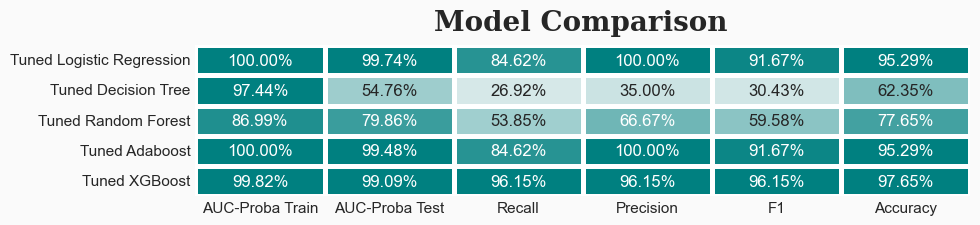

In [114]:
import matplotlib
df_models = round(pd.concat([logreg_df, dtree_df, rforest_df, adaboost_df, xgboost_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])

sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(Colors.LightGray) 
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(1.85,-0.5,'Model Comparison',fontsize=20,fontweight='bold',fontfamily='serif')

fig.show()

### Feature Importance

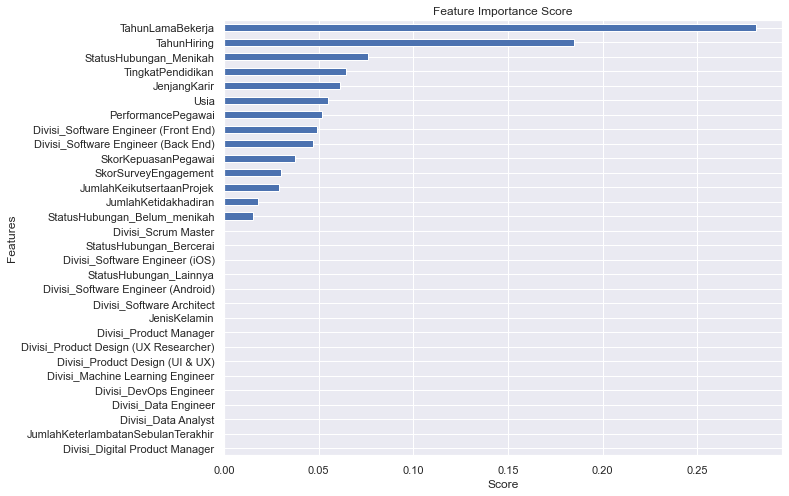

In [115]:
show_feature_importance(tuned_xgboost)

### Shap Value

In [116]:
df_test = pd.DataFrame(X_test)
df_test

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.823387,-0.749504,1.245955,1.051276,1.206818,2.193134,-0.327330,-1.015842,-0.749820,-0.599150,...,-0.101015,-0.071247,3.372684,-0.806226,-0.596795,-0.101015,-0.950708,-0.439057,-0.463383,2.085989
1,-1.214496,-0.749504,0.450151,-0.131409,-1.101877,2.640804,-0.327330,1.026155,0.829588,0.987138,...,-0.101015,-0.071247,-0.296500,-0.806226,-0.596795,-0.101015,-0.950708,-0.439057,2.158041,-0.479389
2,0.823387,1.924402,-1.937259,-0.131409,0.052470,-0.492890,-0.327330,0.345489,-0.749820,0.080688,...,-0.101015,-0.071247,3.372684,-0.806226,-0.596795,-0.101015,-0.950708,-0.439057,-0.463383,2.085989
3,0.823387,-0.749504,-0.345652,-1.314095,-3.410571,-0.492890,1.292955,-0.845675,-0.749820,-1.165681,...,-0.101015,-0.071247,-0.296500,1.240347,-0.596795,-0.101015,1.051847,-0.439057,-0.463383,-0.479389
4,-1.214496,0.587449,0.450151,-1.314095,1.206818,-0.492890,-0.327330,-1.015842,0.829588,-0.712456,...,-0.101015,-0.071247,-0.296500,-0.806226,1.675617,-0.101015,1.051847,-0.439057,-0.463383,-0.479389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,-1.214496,-0.749504,-0.345652,-2.496780,-2.256224,-0.492890,2.913241,-0.165010,-0.749820,1.327057,...,-0.101015,-0.071247,-0.296500,1.240347,-0.596795,-0.101015,-0.950708,-0.439057,2.158041,-0.479389
81,-1.214496,-0.749504,-1.141455,1.051276,-1.101877,2.193134,-0.327330,1.196321,0.829588,0.987138,...,-0.101015,-0.071247,-0.296500,-0.806226,-0.596795,-0.101015,-0.950708,2.277608,-0.463383,-0.479389
82,-1.214496,-0.749504,0.450151,-0.131409,-1.101877,-0.492890,-0.327330,0.855989,-0.749820,0.533913,...,-0.101015,-0.071247,-0.296500,-0.806226,-0.596795,-0.101015,-0.950708,2.277608,-0.463383,-0.479389
83,0.823387,-0.749504,-0.345652,1.051276,-1.101877,-0.492890,-0.327330,-0.505343,0.829588,-1.392294,...,-0.101015,-0.071247,-0.296500,-0.806226,1.675617,-0.101015,-0.950708,-0.439057,2.158041,-0.479389


In [117]:
df_test.columns = X.columns
df_test

,JenisKelamin,JenjangKarir,PerformancePegawai,SkorSurveyEngagement,SkorKepuasanPegawai,JumlahKeikutsertaanProjek,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,Usia,...,Divisi_Scrum Master,Divisi_Software Architect,Divisi_Software Engineer (Android),Divisi_Software Engineer (Back End),Divisi_Software Engineer (Front End),Divisi_Software Engineer (iOS),StatusHubungan_Belum_menikah,StatusHubungan_Bercerai,StatusHubungan_Lainnya,StatusHubungan_Menikah
0,0.823387,-0.749504,1.245955,1.051276,1.206818,2.193134,-0.327330,-1.015842,-0.749820,-0.599150,...,-0.101015,-0.071247,3.372684,-0.806226,-0.596795,-0.101015,-0.950708,-0.439057,-0.463383,2.085989
1,-1.214496,-0.749504,0.450151,-0.131409,-1.101877,2.640804,-0.327330,1.026155,0.829588,0.987138,...,-0.101015,-0.071247,-0.296500,-0.806226,-0.596795,-0.101015,-0.950708,-0.439057,2.158041,-0.479389
2,0.823387,1.924402,-1.937259,-0.131409,0.052470,-0.492890,-0.327330,0.345489,-0.749820,0.080688,...,-0.101015,-0.071247,3.372684,-0.806226,-0.596795,-0.101015,-0.950708,-0.439057,-0.463383,2.085989
3,0.823387,-0.749504,-0.345652,-1.314095,-3.410571,-0.492890,1.292955,-0.845675,-0.749820,-1.165681,...,-0.101015,-0.071247,-0.296500,1.240347,-0.596795,-0.101015,1.051847,-0.439057,-0.463383,-0.479389
4,-1.214496,0.587449,0.450151,-1.314095,1.206818,-0.492890,-0.327330,-1.015842,0.829588,-0.712456,...,-0.101015,-0.071247,-0.296500,-0.806226,1.675617,-0.101015,1.051847,-0.439057,-0.463383,-0.479389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,-1.214496,-0.749504,-0.345652,-2.496780,-2.256224,-0.492890,2.913241,-0.165010,-0.749820,1.327057,...,-0.101015,-0.071247,-0.296500,1.240347,-0.596795,-0.101015,-0.950708,-0.439057,2.158041,-0.479389
81,-1.214496,-0.749504,-1.141455,1.051276,-1.101877,2.193134,-0.327330,1.196321,0.829588,0.987138,...,-0.101015,-0.071247,-0.296500,-0.806226,-0.596795,-0.101015,-0.950708,2.277608,-0.463383,-0.479389
82,-1.214496,-0.749504,0.450151,-0.131409,-1.101877,-0.492890,-0.327330,0.855989,-0.749820,0.533913,...,-0.101015,-0.071247,-0.296500,-0.806226,-0.596795,-0.101015,-0.950708,2.277608,-0.463383,-0.479389
83,0.823387,-0.749504,-0.345652,1.051276,-1.101877,-0.492890,-0.327330,-0.505343,0.829588,-1.392294,...,-0.101015,-0.071247,-0.296500,-0.806226,1.675617,-0.101015,-0.950708,-0.439057,2.158041,-0.479389


In [118]:
import shap

explainer = shap.TreeExplainer(model_xgboost)
shap_values = explainer.shap_values(df_test)

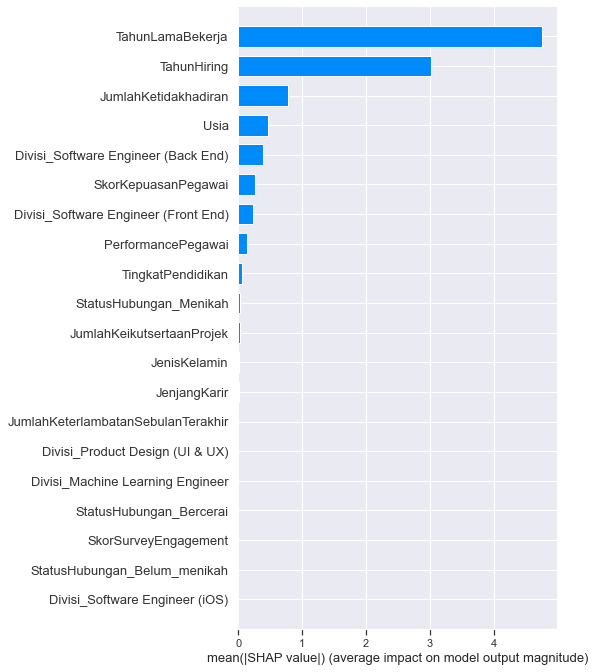

In [119]:
shap.summary_plot(shap_values, df_test, plot_type="bar")

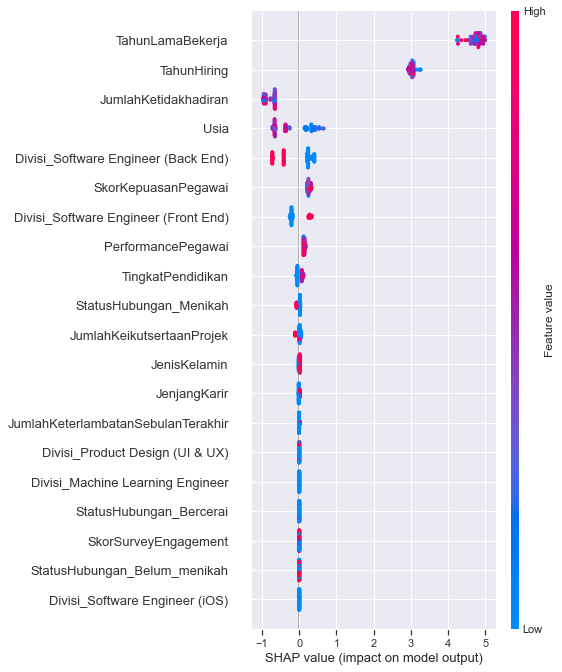

In [120]:
shap.summary_plot(shap_values, df_test)

## Final Model

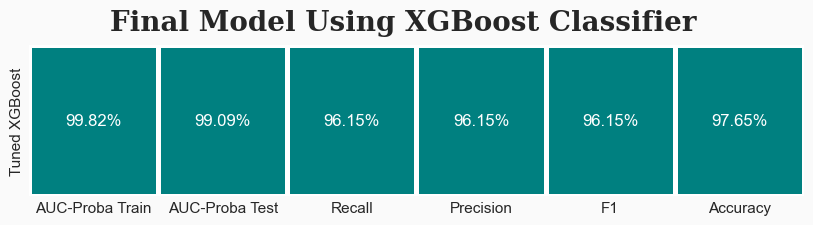

In [121]:
import matplotlib
df_models = round(pd.concat([xgboost_df], axis=1),4)
colors = [Colors.LightGray, Colors.LightCyan, Colors.Teal]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


fig = plt.figure(figsize=(10,8),dpi=100, facecolor=Colors.LightGray) # create figure
gs = fig.add_gridspec(3, 2, wspace=0.1, hspace=0.5)

ax0 = fig.add_subplot(gs[0:1, :])

sns.heatmap(df_models.T, cmap=colormap, annot=True,fmt=".2%",vmin=0,vmax=0.95, linewidths=2.5,cbar=False,ax=ax0,annot_kws={"fontsize":12})
fig.patch.set_facecolor(Colors.LightGray) 
ax0.set_facecolor(Colors.LightGray)
ax0.tick_params(axis=u'both', which=u'both',length=0)

ax0.text(0.625,-0.1,'Final Model Using XGBoost Classifier',fontsize=20,fontweight='bold',fontfamily='serif')

fig.show()

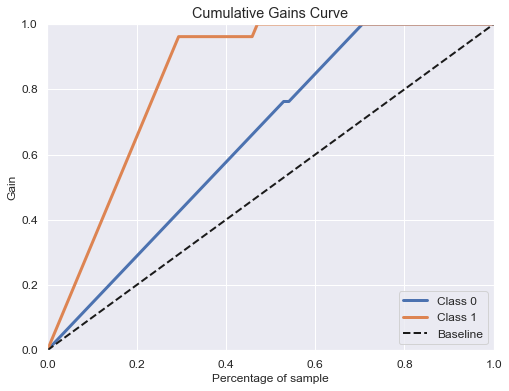

In [122]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test,tuned_xgboost.predict_proba(X_test), title='Cumulative Gains Curve', ax=None, figsize=(8,6), title_fontsize='large')
plt.show()

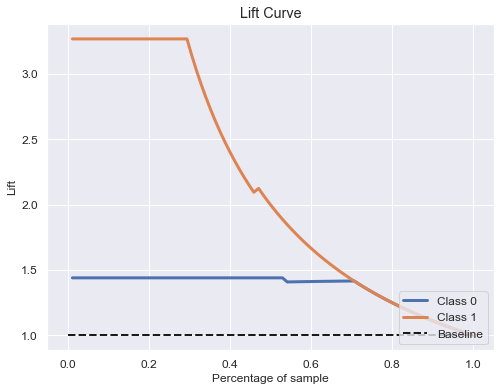

In [123]:
skplt.metrics.plot_lift_curve(y_test,tuned_xgboost.predict_proba(X_test), title='Lift Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')
plt.show()

## EDA Feature Importance

In [124]:
df_ml.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalHiring,TanggalResign,Resign,Usia,TahunLamaBekerja,TahunHiring
0,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,4,4.0,...,0.0,9.0,Magister,masih_bekerja,2011-01-10,2021-01-01,0,49,10,2011
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,...,0.0,3.0,Sarjana,toxic_culture,2014-01-06,2018-06-16,1,37,4,2014
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,...,0.0,11.0,Magister,jam_kerja,2011-01-10,2014-09-24,1,47,4,2011
3,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,3,3.0,...,4.0,6.0,Sarjana,masih_bekerja,2014-02-17,2021-01-01,0,42,7,2014
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,...,0.0,11.0,Sarjana,ganti_karir,2013-11-11,2018-09-06,1,47,5,2013


In [171]:
perform_order = 'Sangat_bagus','Bagus','Biasa','Kurang','Sangat_kurang'
df_ml['PerformancePegawai'] = pd.Categorical(df_ml['PerformancePegawai'], categories=perform_order, ordered=True)

### Performance Pegawai

In [172]:
df_gbgb = df_ml.groupby(['PerformancePegawai','Resign']).agg({'Usia':'count'}).reset_index()
df_gbgb.columns = ['Performa','Resign','Total']
df_gbgb['Rasio'] = df_gbgb.groupby('Performa').apply(lambda x: round(x.Total/x.Total.sum() *100, 0)).values.astype(int)
df_gbgb

,Performa,Resign,Total,Rasio
0,Sangat_bagus,0,44,61
1,Sangat_bagus,1,28,39
2,Bagus,0,57,77
3,Bagus,1,17,23
4,Biasa,0,57,70
5,Biasa,1,25,30
6,Kurang,0,23,74
7,Kurang,1,8,26
8,Sangat_kurang,0,15,62
9,Sangat_kurang,1,9,38


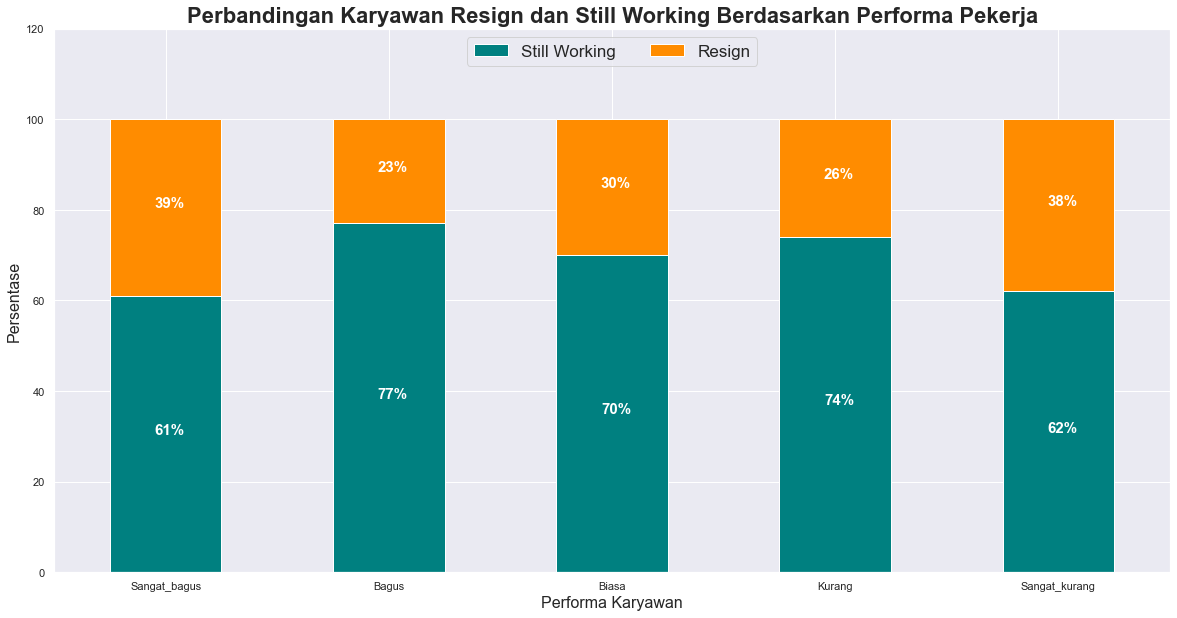

In [175]:
df_gbviz = df_gbgb.pivot_table(index='Performa', columns='Resign', values='Rasio')

df_gbviz.plot(kind='bar', color=['teal','darkorange'], stacked=True, figsize=(20,10))

legend = plt.legend(loc="upper center", ncol=5, fontsize = 17)
legend.get_texts()[0].set_text('Still Working')
legend.get_texts()[1].set_text('Resign')

plt.xlabel('Performa Karyawan', fontsize=16)
plt.xticks(rotation=0, ha="center")
plt.ylabel('Persentase', fontsize=16)
plt.title("Perbandingan Karyawan Resign dan Still Working Berdasarkan Performa Pekerja", fontsize=22, weight='bold')
plt.ylim(0,120)

for n, x in enumerate([*df_gbviz.index.values]):
    for (proportion, y_loc) in zip(df_gbviz.loc[x],
                                   df_gbviz.loc[x].cumsum()):
                
        plt.text(x=n - 0.05,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion,0)}%', 
                 color="white",
                 fontsize=15,
                 fontweight="bold")

plt.show()

### Tahun Lama Bekerja

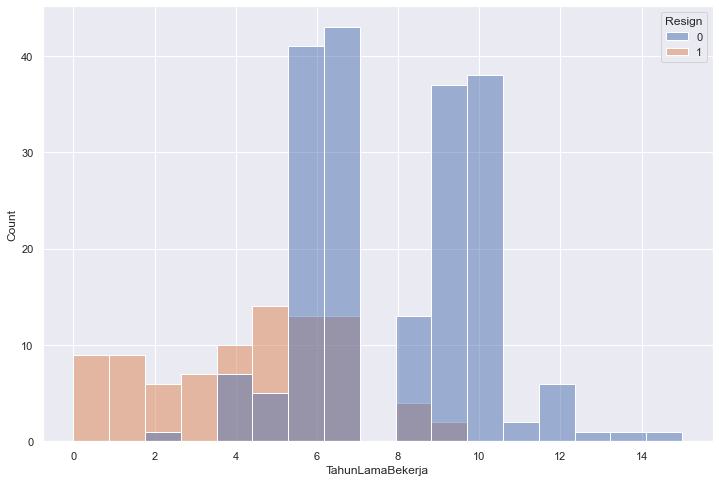

In [125]:
sns.histplot(df_ml, x='TahunLamaBekerja', hue='Resign')
plt.show()

### Usia

In [126]:
df_ml_yes = df_ml[df_ml['Resign']==1]
df_ml_yes.head()

,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,SkorSurveyEngagement,SkorKepuasanPegawai,...,JumlahKeterlambatanSebulanTerakhir,JumlahKetidakhadiran,TingkatPendidikan,AlasanResign,TanggalHiring,TanggalResign,Resign,Usia,TahunLamaBekerja,TahunHiring
1,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,4,4.0,...,0.0,3.0,Sarjana,toxic_culture,2014-01-06,2018-06-16,1,37,4,2014
2,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,4,3.0,...,0.0,11.0,Magister,jam_kerja,2011-01-10,2014-09-24,1,47,4,2011
4,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,3,3.0,...,0.0,11.0,Sarjana,ganti_karir,2013-11-11,2018-09-06,1,47,5,2013
10,Belum_menikah,Pria,FullTime,Software Engineer (Front End),Mid_level,Kurang,Jakarta Timur,CareerBuilder,3,2.0,...,3.0,3.0,Sarjana,ganti_karir,2010-07-20,2019-01-12,1,46,8,2010
11,Bercerai,Wanita,FullTime,Software Engineer (Back End),Senior_level,Sangat_bagus,Jakarta Barat,CareerBuilder,1,5.0,...,5.0,2.0,Magister,tidak_bahagia,2011-07-05,2018-09-19,1,32,7,2011


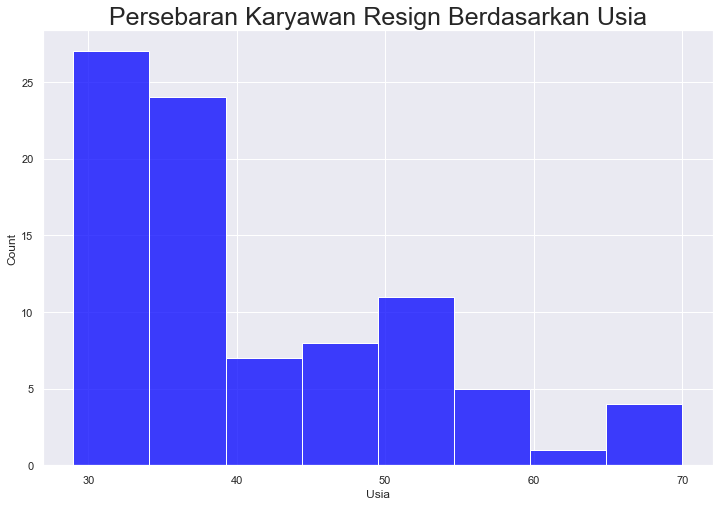

In [127]:
sns.histplot(df_ml_yes, x='Usia', color ='blue')
plt.title('Persebaran Karyawan Resign Berdasarkan Usia', size='25')
plt.show()

### Tingkat Pendidikan dan Jenjang Karir

In [140]:
df_tp_yes = df_ml_yes.groupby(['TingkatPendidikan','JenjangKarir']).agg({'Resign':'sum'}).reset_index()
df_tp_yes['Rasio'] = round(df_tp_yes['Resign']/df_tp_yes['Resign'].sum()*100,0).astype('int')
df_tp_yes

,TingkatPendidikan,JenjangKarir,Resign,Rasio
0,Doktor,Freshgraduate_program,4,5
1,Doktor,Mid_level,2,2
2,Doktor,Senior_level,2,2
3,Magister,Freshgraduate_program,17,20
4,Magister,Mid_level,7,8
5,Magister,Senior_level,8,9
6,Sarjana,Freshgraduate_program,28,32
7,Sarjana,Mid_level,13,15
8,Sarjana,Senior_level,6,7


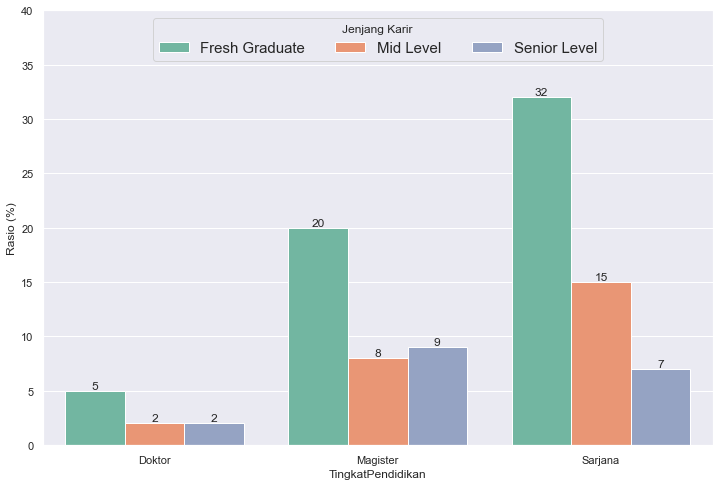

In [154]:
ax = sns.set_theme(style='darkgrid', palette='Set2')
ax = sns.barplot(data=df_tp_yes , x='TingkatPendidikan', y='Rasio', hue='JenjangKarir')
plt.title('Performa Resign Karyawan Berdasarkan Tingkat Pendidikan dan Jenjang Karir',fontsize=22)
plt.ylabel('Rasio (%)')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
legend = plt.legend(loc="upper center", ncol=5, title='Jenjang Karir', fontsize = 15)
legend.get_texts()[0].set_text('Fresh Graduate')
legend.get_texts()[1].set_text('Mid Level')
legend.get_texts()[2].set_text('Senior Level')
plt.ylim(0,40)
plt.show()